In [1]:
#Question 1

In [ ]:
#Part A

Best subset will result in the lowest training RSS because it
considers all possible p+1 models with all numbers of predictors. 
In forward and backward stepwise selection, models are iteratively 
eliminated from consideration as the algorithm progresses. Thus, these 
methods are never guaranteed to find the "best" model with respect to 
training RSS.

In [ ]:
#Part B

Since best subset tests all possible models, its search
for the optimal model is guaranteed to find the model with the lowest
training RSS. However, the model with the lowest training RSS will likely
not be the model will the lowest test RSS, as it likely contains too many
predictors and will experience overfitting problems, increasing the test RSS.
So, if a proper "adjustment technique" is used (i.e. using a statistics like
Mallows Cp, AIC, BIC, Adjusted R^2 or cross-validation), best subset should
produce the model with the lowest test RSS, but either forward or backward
stepwise selection may find a model with lower test RSS by chance.

In [ ]:
#Part C

i) This statement is true. In forward stepwise selection, an additional
predictor is added to the model recursively on the basis of which predictor
improves model fit the most. Thus, the k-variable model is a subet of the 
k+1 variable model.

ii) This statement is true. Since backward stepwise selection begins with
all predictors in the predictor space, and removes them one by one, a k-
variable model will contain one less predictor than the k+1 variable model,
making the former a subset of the latter.

iii) This statement is false. The two algorithms will not necessarily
add/remove the same variables throughout the selection process. A variable
that is initially excluded from the k+1-variable backward selection model
may be immediately included the in k-variable forward selection model.

iv) This statement is false. See part iii, as the same explanation holds true.

v) This statement is false. The k-variable best subset model is chosen from
all the models with k-variables (on the basis of lowest RSS), while
the k+1 variable model is chosen from all the models with k+1 variables, and 
the models ultimately selected from each group may contain entirely different
variables.

In [6]:
#Question 3

In [ ]:
#Part A

The training RSS will staedily decrease as s increases from 0 because the 
coefficients are able to take on values closer and closer to their OLS estimates,
making the model more flexible, and in turn, reducing training RSS.

In [ ]:
#Part B

The test RSS will decrease initially and then eventually start increasing in a U
shape. This occurs because of overfitting; as the value of s arbitrarily increases,
the model is able to improve its fit without significant limitation. When using
this model on a new dataset, however, it will have too little generality, leading
to a higher test RSS. There is an initial gain, however, in allowing s to increase
above 0, which explains the U shape pattern.

In [ ]:
#Part C

The variance will steadily increase. When s is equal to zero, the model will predict 
a horizontal line (only the y-intercept). This "model" has no variance, but as s is 
allowed to increase, the variance of the model will increase as more coefficients 
(with higher values)are added to the model due to relaxing the constraint.

In [10]:
#Part D

The bias of the model will steadily decrease. This effect is the counterpart of what 
is observed in part c; as s is allowed to increase, the model fit improves 
monotonically, which reduces the bias (but increases the variance) on the training 
data.

In [ ]:
#Part E

The irreducible error will remain constant as s increases, as it does not depend on the
characteristics of the model (hence, "irreducible error").

In [12]:
#Question 8

In [15]:
#Part A

X <- rnorm(100)
Noise <- rnorm(100)

In [19]:
#Part B

#Generating the response
Y <- 5 + 2*X + 8*X^2 - 10*X^3 + Noise

Subset selection object
Call: regsubsets.formula(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + 
    I(X^6) + I(X^7) + I(X^8) + I(X^9) + I(X^10), data = my.data, 
    nvmax = 10)
10 Variables  (and intercept)
        Forced in Forced out
X           FALSE      FALSE
I(X^2)      FALSE      FALSE
I(X^3)      FALSE      FALSE
I(X^4)      FALSE      FALSE
I(X^5)      FALSE      FALSE
I(X^6)      FALSE      FALSE
I(X^7)      FALSE      FALSE
I(X^8)      FALSE      FALSE
I(X^9)      FALSE      FALSE
I(X^10)     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   I(X^2) I(X^3) I(X^4) I(X^5) I(X^6) I(X^7) I(X^8) I(X^9) I(X^10)
1  ( 1 )  " " " "    "*"    " "    " "    " "    " "    " "    " "    " "    
2  ( 1 )  " " "*"    "*"    " "    " "    " "    " "    " "    " "    " "    
3  ( 1 )  "*" "*"    "*"    " "    " "    " "    " "    " "    " "    " "    
4  ( 1 )  "*" "*"    "*"    "*"    " "    " "    " "    " "    " "    " "    
5  ( 1 )  "*" "*"    

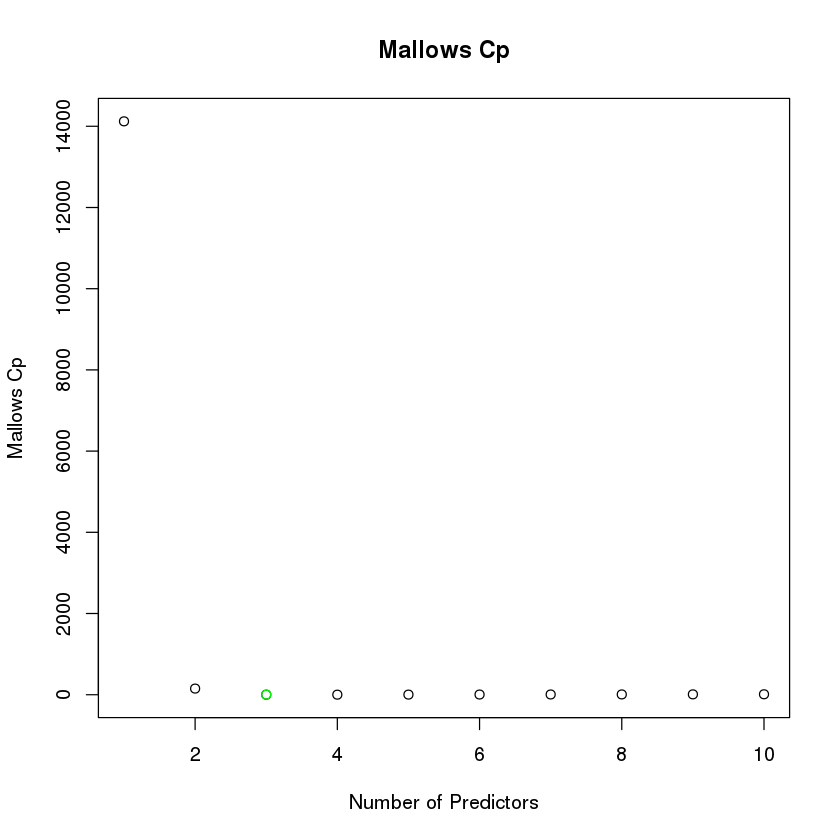

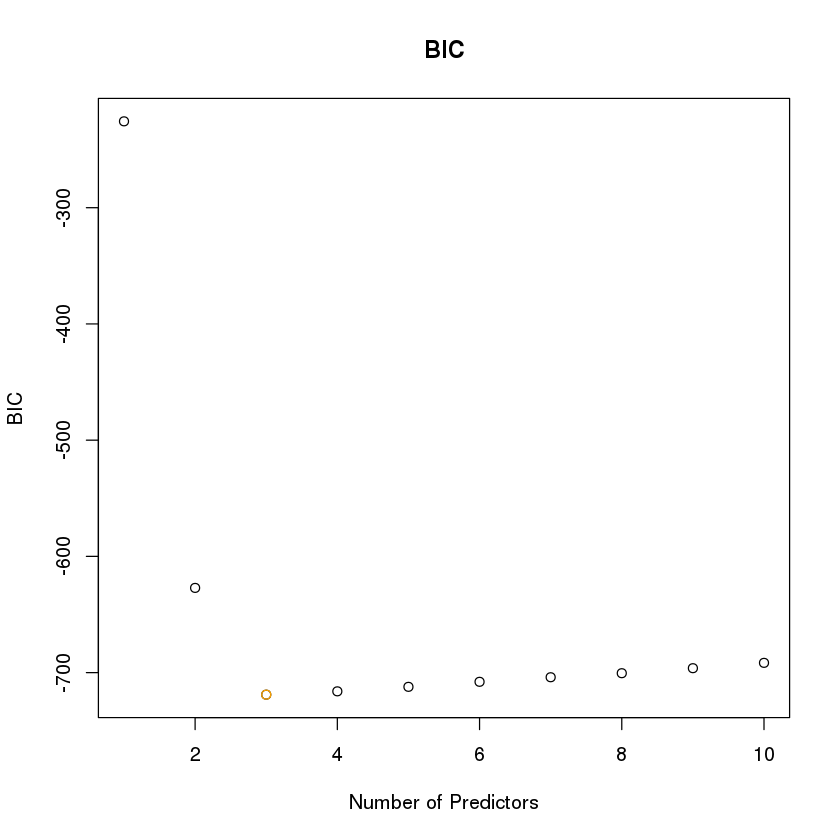

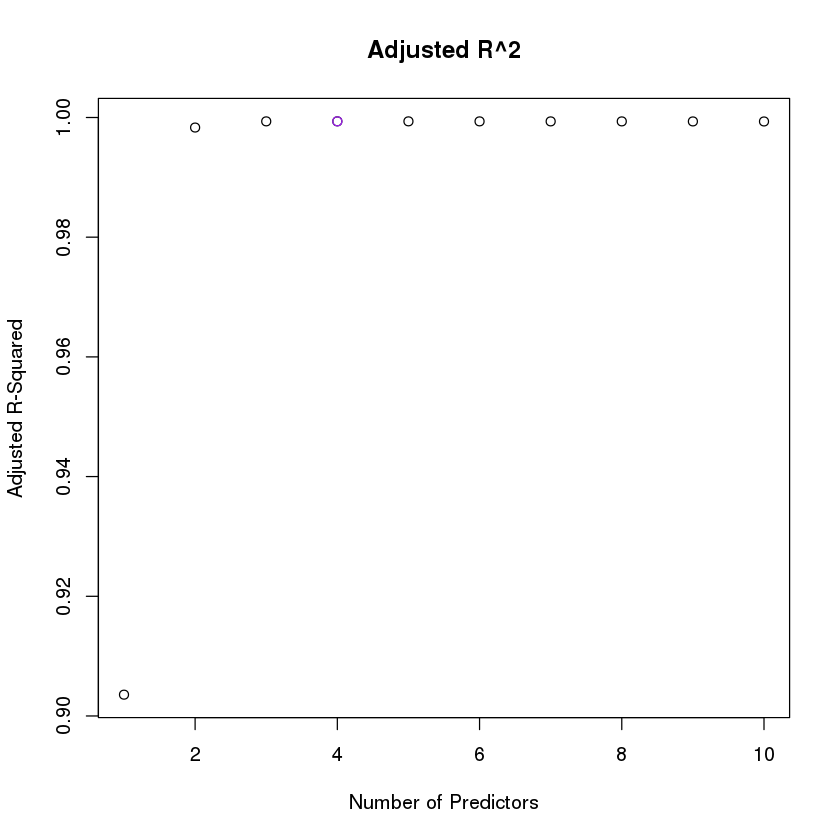

In [50]:
#Part C

#Set up dataframe
my.data <- data.frame(x=X, y=Y)

#Load "leaps" library
library(leaps)
my.subsets <- regsubsets(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) 
+ I(X^7) + I(X^8) + I(X^9) + I(X^10), data=my.data, nvmax=10)

#Summarizing the results of the subset selection
my.summary <-summary(my.subsets); my.summary

#Plots with Mallows Cp, BIC, and Adjusted R^2
#Mallows Cp
plot(my.summary$cp, xlab="Number of Predictors", ylab="Mallows Cp", main="Mallows Cp")
points(which.min(my.summary$cp), my.summary$cp[which.min(my.summary$cp)], col="green")

#BIC
plot(my.summary$bic, xlab="Number of Predictors", ylab="BIC", main="BIC")
points(which.min(my.summary$bic), my.summary$bic[which.min(my.summary$bic)], 
       col="orange")

#Adjusted R^2
plot(my.summary$adjr2, xlab="Number of Predictors", ylab="Adjusted R-Squared", 
     main="Adjusted R^2")
points(which.max(my.summary$adjr2), my.summary$adjr2[which.max(my.summary$adjr2)], 
       col="purple")

In [36]:
With Mallows Cp and BIC, the best model is generated using three (3) 
predictors. With Adjusted R^2, the best model is generated using four 
(4) predictors. The coefficients of the best models are presented below.

In [58]:
#Mallows Cp coefficients
coef(my.subsets, which.min(my.summary$cp))

#BIC coefficients
coef(my.subsets, which.min(my.summary$bic))

#Adjusted R^2 coefficients
coef(my.subsets, which.max(my.summary$adjr2))

(Intercept)           X      I(X^2)      I(X^3) 
   5.069282    1.900641    7.970250   -9.939699

(Intercept)           X      I(X^2)      I(X^3) 
   5.069282    1.900641    7.970250   -9.939699

(Intercept)           X      I(X^2)      I(X^3)      I(X^4) 
 4.95766303  1.88713290  8.18256558 -9.93854680 -0.03960284

In [43]:
#Part D - Forward Stepwise Selection

#By adjusting a few parameters in part C, we can reuse most of the code
my.subsets.fwd <- regsubsets(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6)
+ I(X^7) + I(X^8) + I(X^9) + I(X^10), data=my.data, nvmax=10, method="forward")
my.summary.fwd <- summary(my.subsets.fwd); my.summary.fwd

Subset selection object
Call: regsubsets.formula(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + 
    I(X^6) + I(X^7) + I(X^8) + I(X^9) + I(X^10), data = my.data, 
    nvmax = 10, method = "forward")
10 Variables  (and intercept)
        Forced in Forced out
X           FALSE      FALSE
I(X^2)      FALSE      FALSE
I(X^3)      FALSE      FALSE
I(X^4)      FALSE      FALSE
I(X^5)      FALSE      FALSE
I(X^6)      FALSE      FALSE
I(X^7)      FALSE      FALSE
I(X^8)      FALSE      FALSE
I(X^9)      FALSE      FALSE
I(X^10)     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X   I(X^2) I(X^3) I(X^4) I(X^5) I(X^6) I(X^7) I(X^8) I(X^9) I(X^10)
1  ( 1 )  " " " "    "*"    " "    " "    " "    " "    " "    " "    " "    
2  ( 1 )  " " "*"    "*"    " "    " "    " "    " "    " "    " "    " "    
3  ( 1 )  "*" "*"    "*"    " "    " "    " "    " "    " "    " "    " "    
4  ( 1 )  "*" "*"    "*"    "*"    " "    " "    " "    " "    " "    " "    
5  (

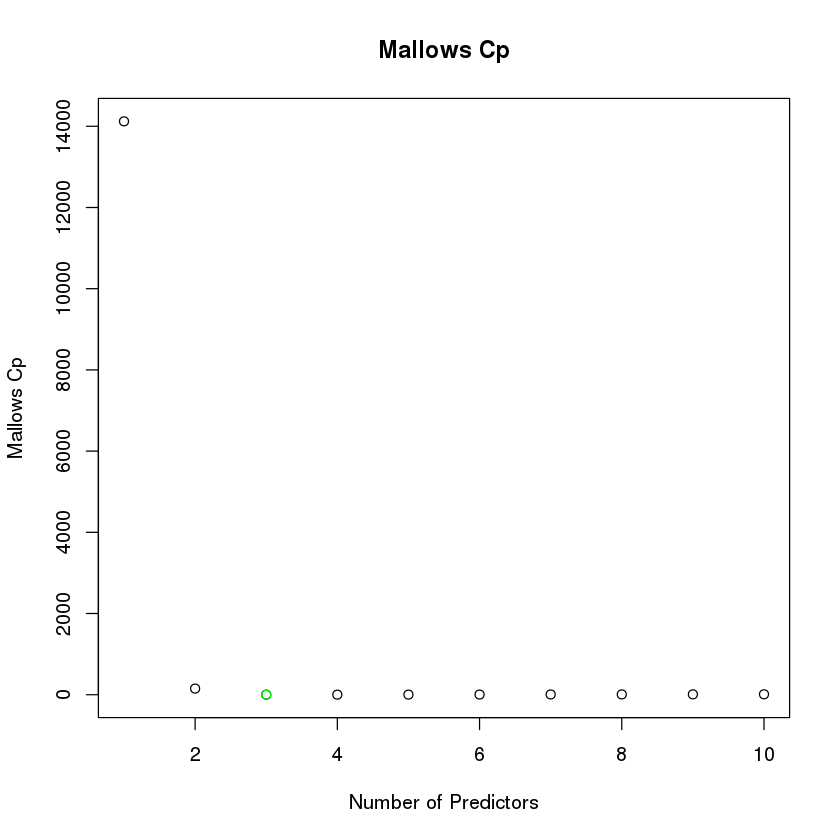

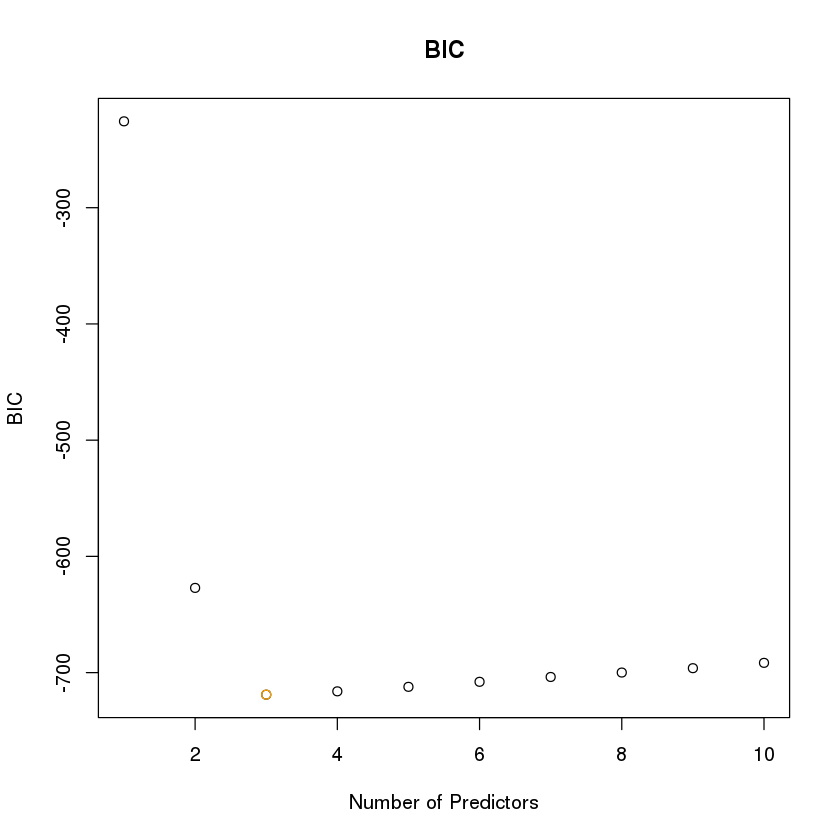

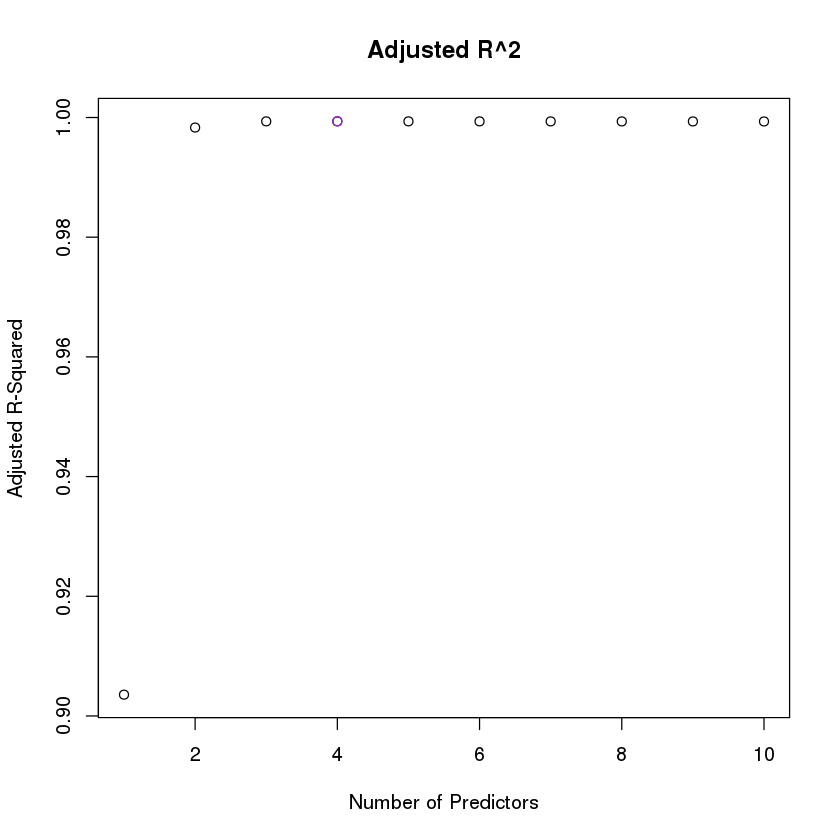

In [53]:
#Plots with Mallows Cp, BIC, and Adjusted R^2
#Mallows Cp
plot(my.summary.fwd$cp, xlab="Number of Predictors", ylab="Mallows Cp", 
     main="Mallows Cp")
points(which.min(my.summary.fwd$cp), my.summary.fwd$cp[which.min(my.summary.fwd$cp)], 
       col="green")

#BIC
plot(my.summary.fwd$bic, xlab="Number of Predictors", ylab="BIC", main="BIC")
points(which.min(my.summary.fwd$bic), my.summary.fwd$bic[which.min(my.summary.fwd$bic)],
       col="orange")

#Adjusted R^2
plot(my.summary.fwd$adjr2, xlab="Number of Predictors", ylab="Adjusted R-Squared", 
     main="Adjusted R^2")
points(which.max(my.summary.fwd$adjr2), my.summary.fwd$adjr2[which.max(my.summary.fwd$adjr2)], 
       col="purple")

In [46]:
With forward stepwise selection, the model choices are identical to part c.
The coefficients for the respective models are present below.

In [57]:
#Mallows Cp coefficients
coef(my.subsets.fwd, which.min(my.summary.fwd$cp))

#BIC coefficients
coef(my.subsets.fwd, which.min(my.summary.fwd$bic))

#Adjusted R^2 coefficients
coef(my.subsets.fwd, which.max(my.summary.fwd$adjr2))

(Intercept)           X      I(X^2)      I(X^3) 
   5.069282    1.900641    7.970250   -9.939699

(Intercept)           X      I(X^2)      I(X^3) 
   5.069282    1.900641    7.970250   -9.939699

(Intercept)           X      I(X^2)      I(X^3)      I(X^4) 
 4.95766303  1.88713290  8.18256558 -9.93854680 -0.03960284

In [49]:
#Part D - Backward Stepwise Selection

my.subsets.bk <- regsubsets(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6)
+ I(X^7) + I(X^8) + I(X^9) + I(X^10), data=my.data, nvmax=10, method="backward")
my.summary.bk <- summary(my.subsets.bk); my.summary.bk

Subset selection object
Call: regsubsets.formula(Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + 
    I(X^6) + I(X^7) + I(X^8) + I(X^9) + I(X^10), data = my.data, 
    nvmax = 10, method = "backward")
10 Variables  (and intercept)
        Forced in Forced out
X           FALSE      FALSE
I(X^2)      FALSE      FALSE
I(X^3)      FALSE      FALSE
I(X^4)      FALSE      FALSE
I(X^5)      FALSE      FALSE
I(X^6)      FALSE      FALSE
I(X^7)      FALSE      FALSE
I(X^8)      FALSE      FALSE
I(X^9)      FALSE      FALSE
I(X^10)     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          X   I(X^2) I(X^3) I(X^4) I(X^5) I(X^6) I(X^7) I(X^8) I(X^9) I(X^10)
1  ( 1 )  " " " "    "*"    " "    " "    " "    " "    " "    " "    " "    
2  ( 1 )  " " "*"    "*"    " "    " "    " "    " "    " "    " "    " "    
3  ( 1 )  "*" "*"    "*"    " "    " "    " "    " "    " "    " "    " "    
4  ( 1 )  "*" "*"    "*"    " "    " "    "*"    " "    " "    " "    " "    
5 

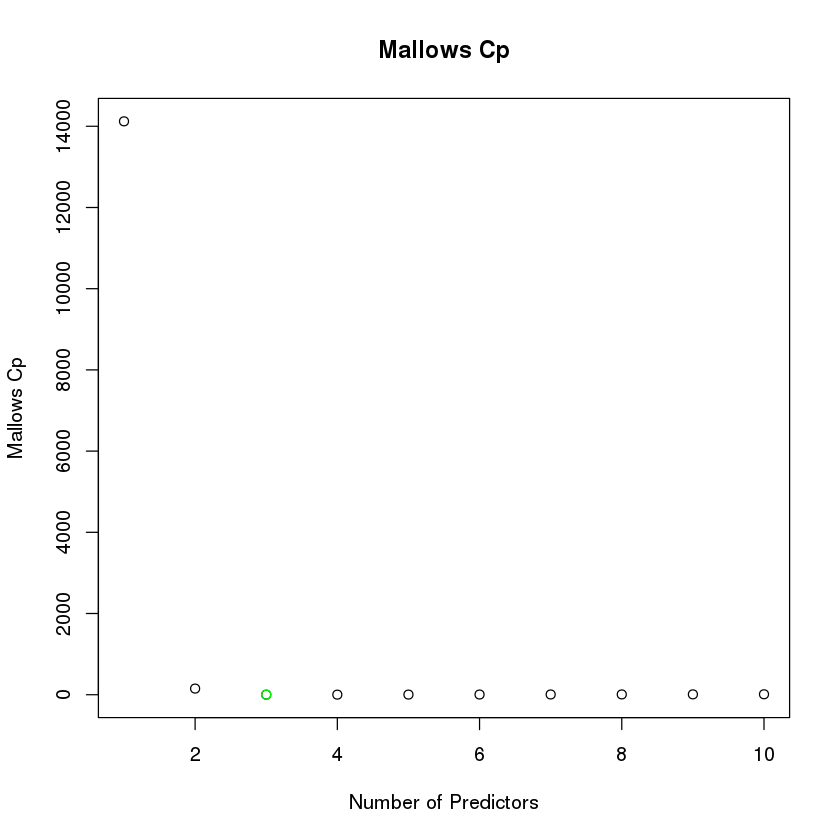

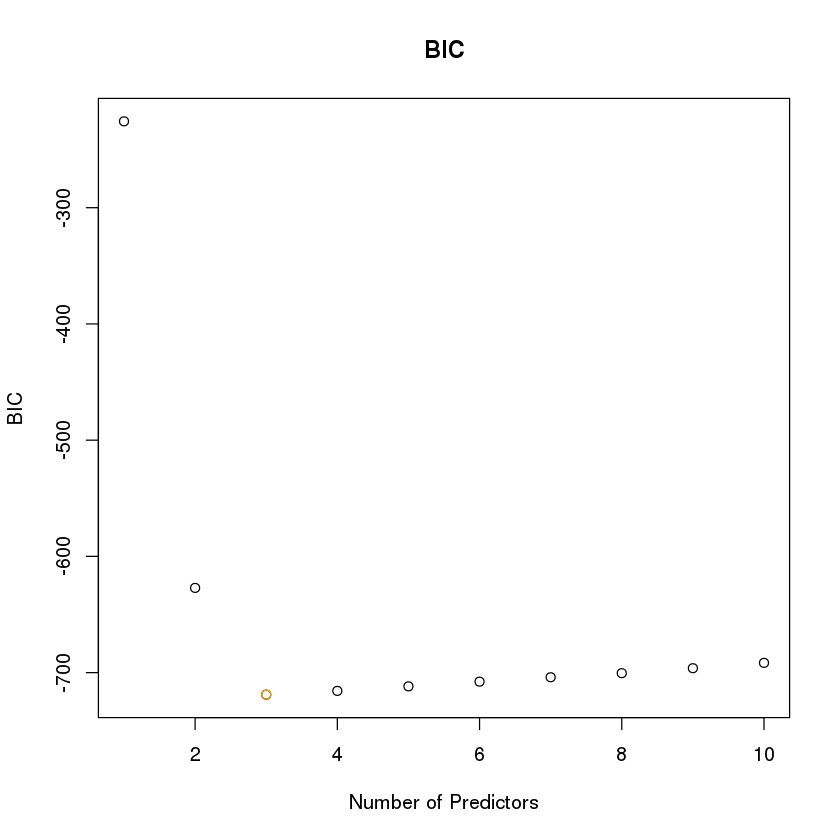

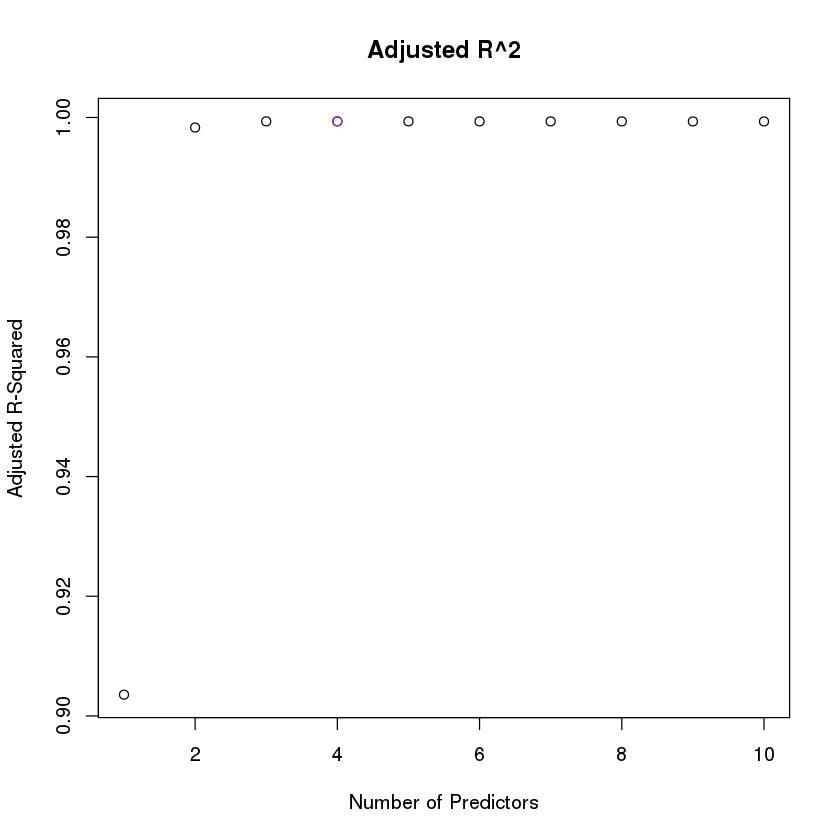

In [69]:
#Plots with Mallows Cp, BIC, and Adjusted R^2
#Mallows Cp
plot(my.summary.bk$cp, xlab="Number of Predictors", ylab="Mallows Cp", 
     main="Mallows Cp")
points(which.min(my.summary.bk$cp), my.summary.bk$cp[which.min(my.summary.bk$cp)], 
       col="green")

#BIC
plot(my.summary.bk$bic, xlab="Number of Predictors", ylab="BIC", main="BIC")
points(which.min(my.summary.bk$bic), my.summary.bk$bic[which.min(my.summary.bk$bic)], 
       col="orange")

#Adjusted R^2
plot(my.summary.bk$adjr2, xlab="Number of Predictors", ylab="Adjusted R-Squared", 
     main="Adjusted R^2")
points(which.max(my.summary.bk$adjr2), my.summary.bk$adjr2[which.max(my.summary.bk$adjr2)], 
       col="purple")

In [54]:
In the case of backward selection, Mallows Cp chooses a model with one 
(1) predictor, BIC chooses a model with three (3) predictors, and Adjusted
R-squared chooses a model with four (4) predictors. The coefficients are 
presented below.

In [56]:
#Mallows Cp coefficients
coef(my.subsets.bk, which.min(my.summary.bk$cp))

#BIC coefficients
coef(my.subsets.bk, which.min(my.summary.bk$bic))

#Adjusted R^2 coefficients
coef(my.subsets.bk, which.max(my.summary.bk$adjr2))

(Intercept)           X      I(X^2)      I(X^3) 
   5.069282    1.900641    7.970250   -9.939699

(Intercept)           X      I(X^2)      I(X^3) 
   5.069282    1.900641    7.970250   -9.939699

(Intercept)            X       I(X^2)       I(X^3)       I(X^6) 
 4.985675129  1.894044278  8.095016978 -9.941189103 -0.004072702

In [ ]:
Summarizing the results from parts c and d, we see that Mallows Cp and
BIC always choose three variable models with X, X^2, and X^3. Adjusted R^2,
on the other hand, always chooses four-variable models, but with differences
in predictors. For best subset and forward stepwise selection, Adjusted R^2
chooses the predictors X, X^2, X^3 and X^4, but with backward stepwise selection,
Adjusted R^2 replaces X^4 with X^6.

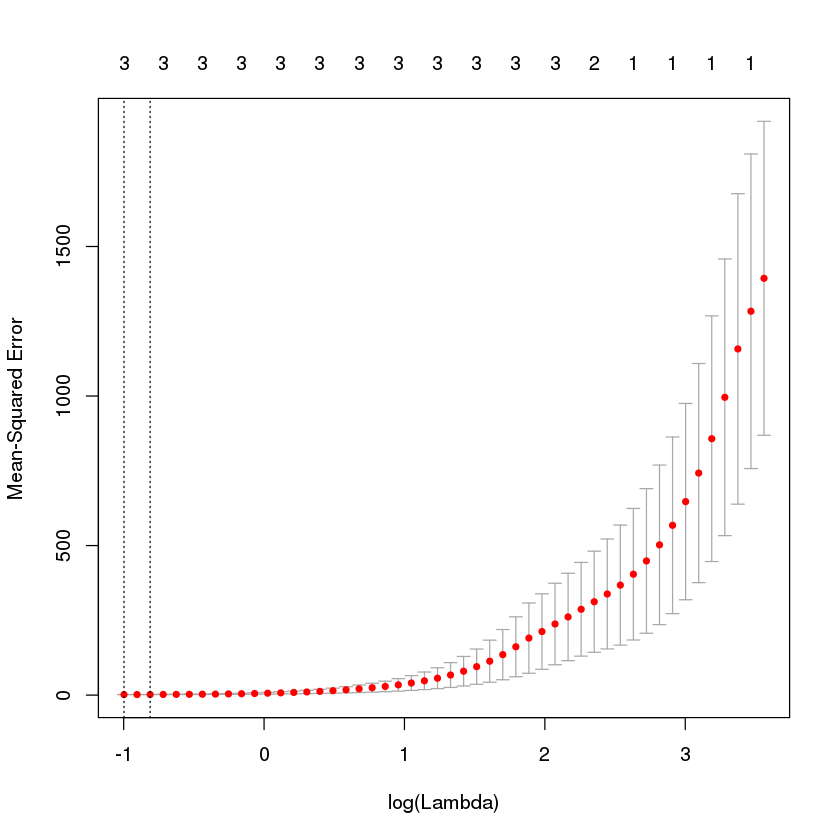

In [76]:
#Part E

#Load the "glmnet" library
library(glmnet)

my.matrix <- model.matrix(y ~ x + I(x^2) + I(x^3) + I(x^4) + I(x^5) + I(x^6) + 
I(x^7) + I(x^8) + I(x^9) + I(x^10), data = my.data)[, -1]
my.lasso <- cv.glmnet(my.matrix, Y, alpha=1)
plot(my.lasso)

In [77]:
#Selecting the minimum value of lambda
optimal.lambda <- my.lasso$lambda.min
optimal.lambda

[1] 0.3687263

In [78]:
#Use the cross-validated value of lambda to refit the model
fit.lasso <- glmnet(my.matrix, Y, alpha = 1)
predict(fit.lasso, s = optimal.lambda, type = "coefficients")[1:11, ]

(Intercept)           x      I(x^2)      I(x^3)      I(x^4)      I(x^5) 
  5.4009826   0.0000000   7.6390725  -8.5610483   0.0000000  -0.1562107 
     I(x^6)      I(x^7)      I(x^8)      I(x^9)     I(x^10) 
  0.0000000   0.0000000   0.0000000   0.0000000   0.0000000

In [ ]:
As we can see from above, the lasso method chooses predictors X^2, X^3,
and X^5 for the optimal model.

In [66]:
#Part F

#Generating the response with B0=5 (as before) and B7=8
y <- 5 + 8*X^7 + Noise
my.data2 <- data.frame(y=y, x=X)

In [67]:
#Perform best subset selection

PartFSubset <- regsubsets(y ~ x + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6)
+ I(X^7) + I(X^8) + I(X^9) + I(X^10), data=my.data2, nvmax=10)
PartFSummary <- summary(PartFSubset); PartFSummary

Subset selection object
Call: regsubsets.formula(y ~ x + I(X^2) + I(X^3) + I(X^4) + I(X^5) + 
    I(X^6) + I(X^7) + I(X^8) + I(X^9) + I(X^10), data = my.data2, 
    nvmax = 10)
10 Variables  (and intercept)
        Forced in Forced out
x           FALSE      FALSE
I(X^2)      FALSE      FALSE
I(X^3)      FALSE      FALSE
I(X^4)      FALSE      FALSE
I(X^5)      FALSE      FALSE
I(X^6)      FALSE      FALSE
I(X^7)      FALSE      FALSE
I(X^8)      FALSE      FALSE
I(X^9)      FALSE      FALSE
I(X^10)     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          x   I(X^2) I(X^3) I(X^4) I(X^5) I(X^6) I(X^7) I(X^8) I(X^9) I(X^10)
1  ( 1 )  " " " "    " "    " "    " "    " "    "*"    " "    " "    " "    
2  ( 1 )  " " " "    " "    " "    " "    " "    "*"    "*"    " "    " "    
3  ( 1 )  " " " "    " "    " "    " "    " "    "*"    " "    "*"    "*"    
4  ( 1 )  " " "*"    " "    "*"    " "    " "    "*"    " "    "*"    " "    
5  ( 1 )  " " "*"   

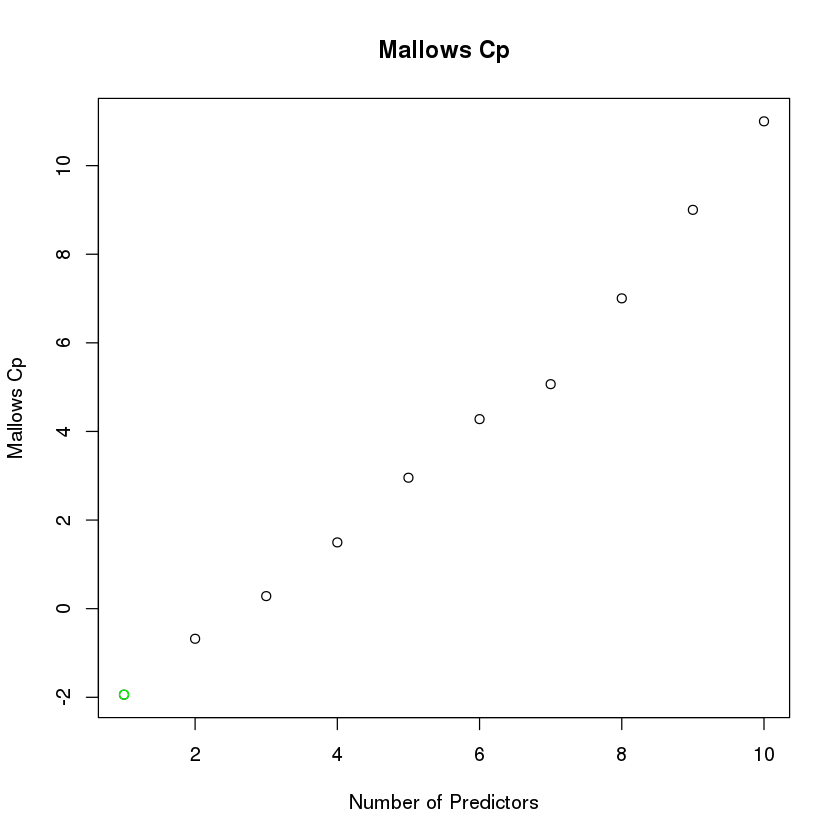

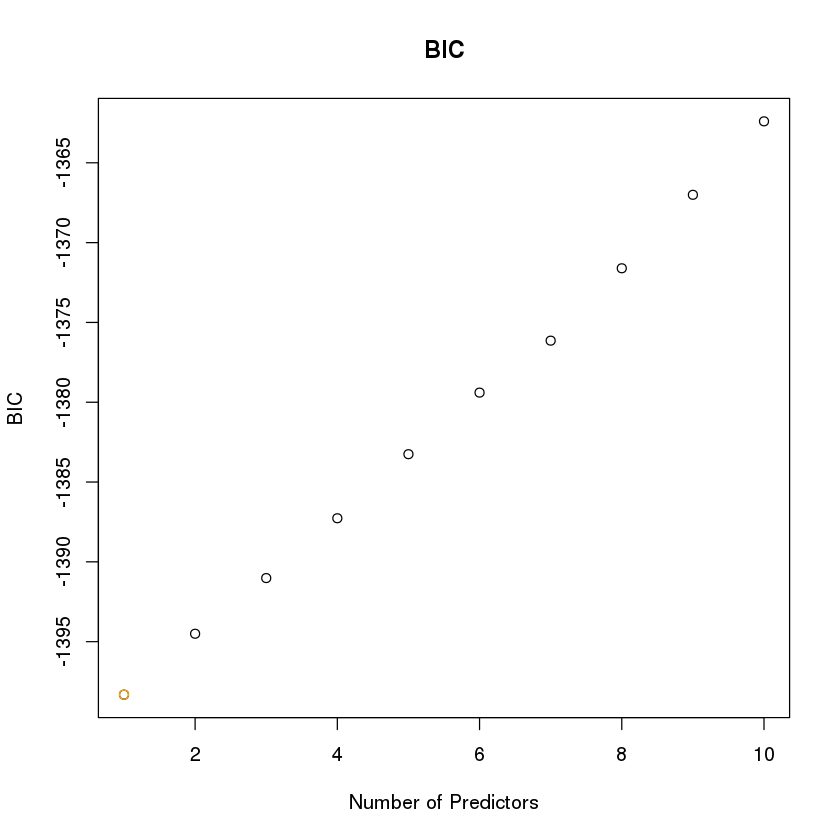

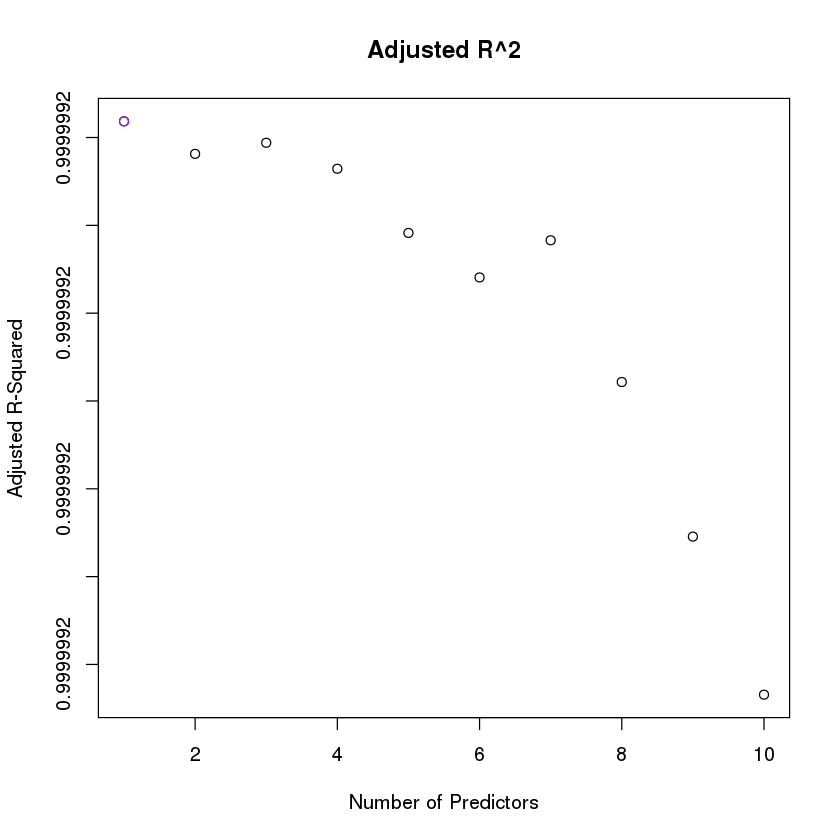

In [70]:
#Plots with Mallows Cp, BIC, and Adjusted R^2
#Mallows Cp
plot(PartFSummary$cp, xlab="Number of Predictors", ylab="Mallows Cp", 
     main="Mallows Cp")
points(which.min(PartFSummary$cp), PartFSummary$cp[which.min(PartFSummary$cp)], 
       col="green")

#BIC
plot(PartFSummary$bic, xlab="Number of Predictors", ylab="BIC", main="BIC")
points(which.min(PartFSummary$bic), PartFSummary$bic[which.min(PartFSummary$bic)], 
       col="orange")

#Adjusted R^2
plot(PartFSummary$adjr2, xlab="Number of Predictors", ylab="Adjusted R-Squared", 
     main="Adjusted R^2")
points(which.max(PartFSummary$adjr2), PartFSummary$adjr2[which.max(PartFSummary$adjr2)], 
       col="purple")

In [71]:
#Based on best subset selection, the one variable model is chosen for each method

In [72]:
#Part F - Lasso

PartFMatrix <- model.matrix(y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6)
+ I(X^7) + I(X^8) + I(X^9) + I(X^10), data = my.data2)[, -1]
PartFCV <- cv.glmnet(PartFMatrix, y, alpha = 1)
optimal.lambda2 <- PartFCV$lambda.min
optimal.lambda2

[1] 33.88153

In [73]:
my.lasso2 <- glmnet(PartFMatrix, y, alpha = 1)
predict(my.lasso2, s = optimal.lambda2, type = "coefficients")[1:11, ]

(Intercept)           X      I(X^2)      I(X^3)      I(X^4)      I(X^5) 
   5.953562    0.000000    0.000000    0.000000    0.000000    0.000000 
     I(X^6)      I(X^7)      I(X^8)      I(X^9)     I(X^10) 
   0.000000    7.745080    0.000000    0.000000    0.000000

In [ ]:
The lasso model selects the best one-variable model which has the predictor
X^7.

In [ ]:
#Question 10

In [83]:
#Part A

#Generating the dataset
set.seed(0)
x <- matrix(rnorm(1000*20), 1000, 20)
b <- rnorm(20)
b[5] <- 0
b[11] <- 0
b[13] <- 0
b[17] <- 0
b[18] <- 0
Error <- rnorm(1000)
y <- x%*%b + Error

In [84]:
#Part B

#Splitting the dataset
train <- sample(seq(1000), 100, replace=FALSE)
test <- -train
x.train <- x[train, ]
x.test <- x[test, ]
y.train <- y[train]
y.test <- y[test]

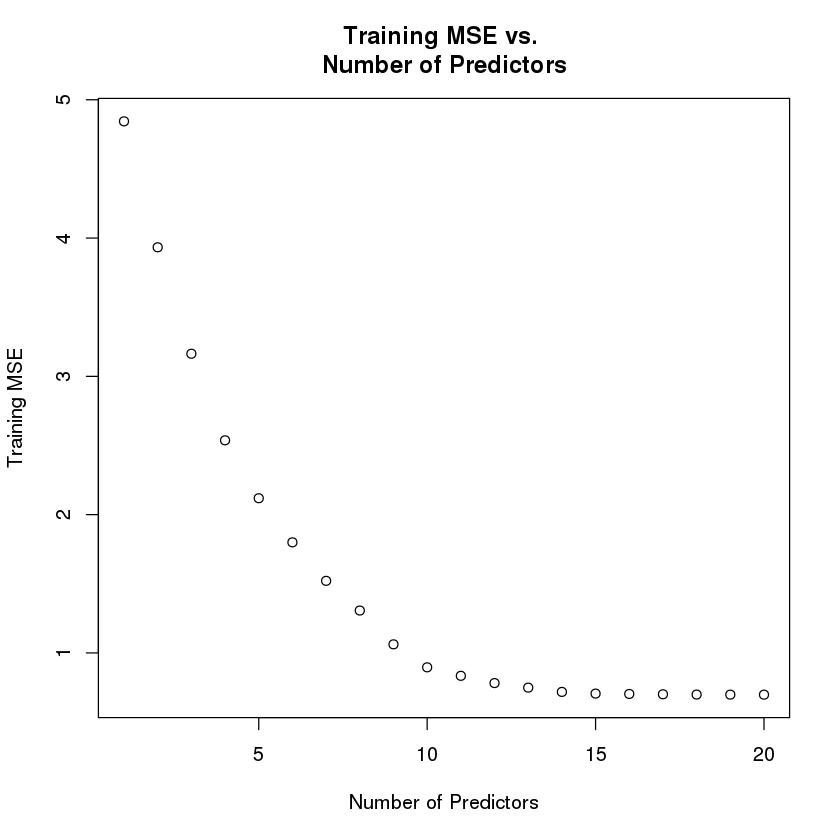

In [98]:
#Part C

training.data <- data.frame(y=y.train, x=x.train)
subsets <- regsubsets(y ~ ., data=training.data, nvmax=20)
training.matrix <- model.matrix(y ~ ., data=training.data, nvmax=20)
val.errors <- rep(NA, 20)
for (i in 1:20) {
    coefi <- coef(subsets, id = i)
    pred <- training.matrix[, names(coefi)] %*% coefi
    val.errors[i] <- mean((pred - y.train)^2)
}
plot(val.errors, xlab="Number of Predictors", ylab="Training MSE", main="Training MSE vs. 
Number of Predictors")

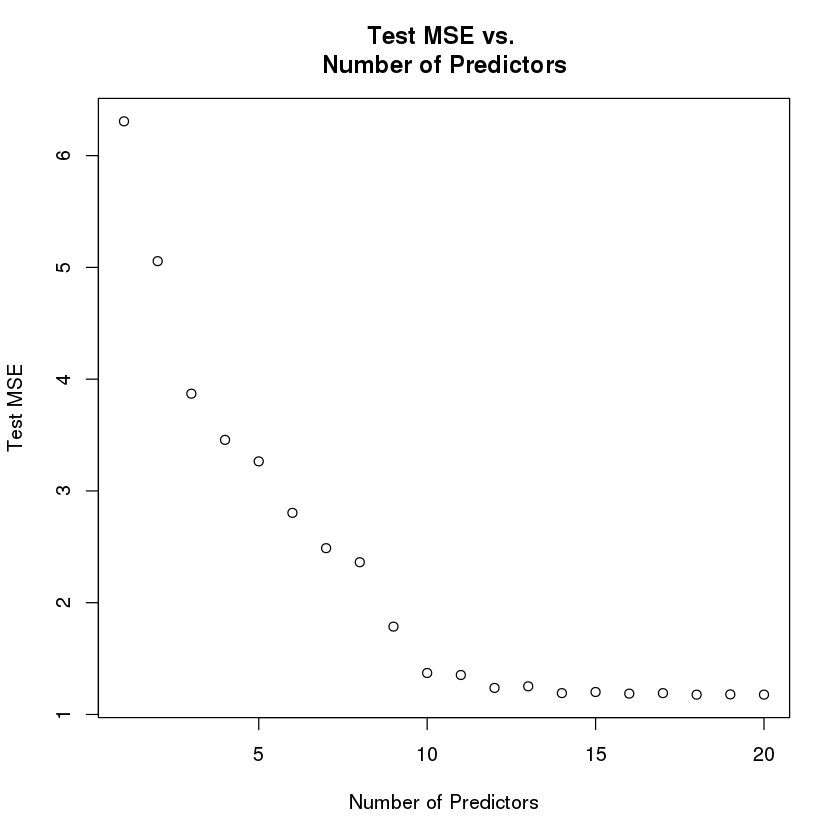

In [99]:
#Part D - Test MSE

test.data <- data.frame(y=y.test, x=x.test)
subsets2 <- regsubsets(y ~ ., data=test.data, nvmax=20)
training.matrix <- model.matrix(y ~ ., data=test.data, nvmax=20)
val.errors <- rep(NA, 20)
for (i in 1:20) {
    coefi <- coef(subsets, id = i)
    pred <- training.matrix[, names(coefi)] %*% coefi
    val.errors[i] <- mean((pred - y.test)^2)
}
plot(val.errors, xlab="Number of Predictors", ylab="Test MSE", main="Test MSE vs. 
Number of Predictors")

In [92]:
#Part E

#Locating the minimum value of Test MSE
which.min(val.errors)

[1] 18

In [93]:
#As one can observe from the plot and code above, the minimum value of Test MSE
#occurs in the 18-predictor model

In [94]:
#Part F

coef(subsets2, which.min(val.errors))

(Intercept)         x.1         x.2         x.3         x.4         x.5 
 0.02989049 -0.50587391  0.08036431 -0.26895469  0.62212860  0.04083998 
        x.6         x.7         x.8         x.9        x.10        x.12 
-1.09577270  1.02848912 -0.73931797 -0.36312015 -0.67999740  1.94583276 
       x.14        x.15        x.16        x.17        x.18        x.19 
-0.66576929 -0.42499186 -0.24020303  0.01846890 -0.01433880  0.17476050 
       x.20 
-0.24005406

In [ ]:
The coefficient values of the 18-predictor model are displayed above.
In both the true DGP and the model, the coefficient values of B5, B11 and
B13 are zero. The other coefficient values for which B=0 in the true DGP 
are very close to zero in the model, namely for B17 and B18.

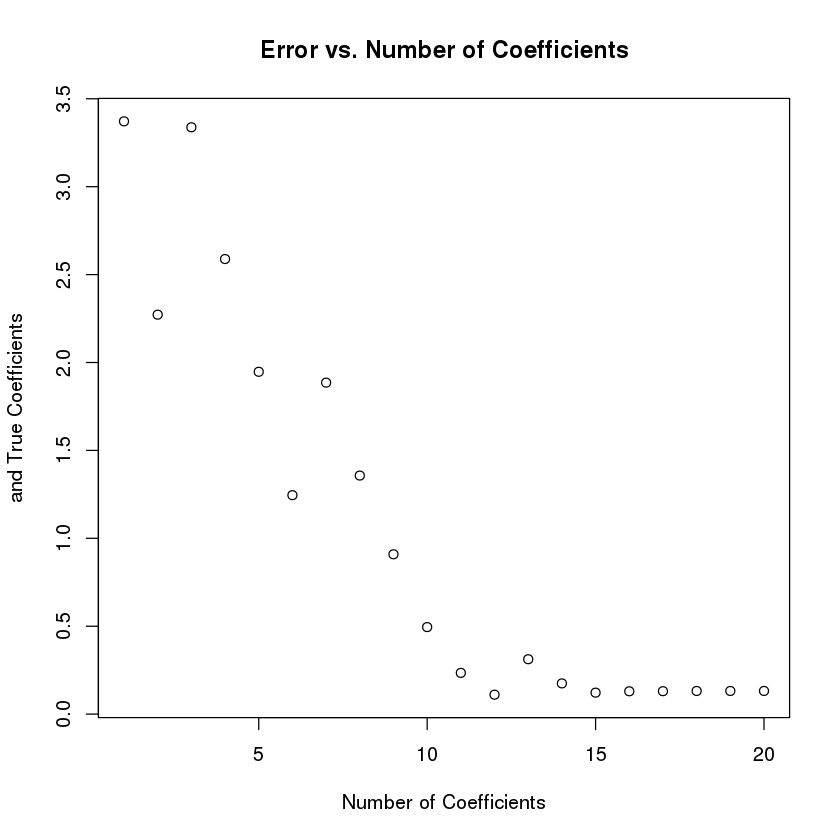

In [97]:
#Part G

#Plot
val.errors <- rep(NA, 20)
x_cols = colnames(x, do.NULL = FALSE, prefix = "x.")
for (i in 1:20) {
    coefi <- coef(subsets2, id = i)
    val.errors[i] <- sqrt(sum((b[x_cols %in% names(coefi)] -                            
    coefi[names(coefi) %in% x_cols])^2) + sum(b[!(x_cols %in% names(coefi))])^2)
}
plot(val.errors, xlab="Number of Coefficients", ylab="Error between Estimated 
and True Coefficients", main="Error vs. Number of Coefficients")

In [ ]:
This plot shows that the number of predictors that minimizes Test MSE (18)
has a very small difference of estimated and true coefficients. In this case,
the accurate coefficient estimates produce very accurate test results.